In [1]:
import pandas as pd
# Read in our dataset
df = pd.read_csv("StudentPerformanceFactorsPuhas.csv", sep=';') 
print("Shape:", df.shape)
df.head() 
# Check if the separation was done correctly

Shape: (6378, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


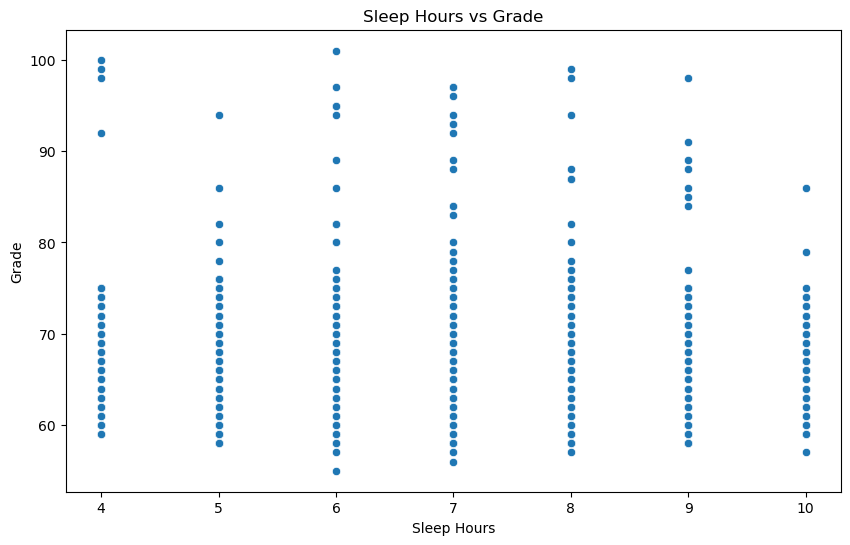

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Made a scatterplot to see if there could be any correlations between sleep hours and the exam gradem
plt.figure(figsize=(10,6))
sns.scatterplot(x='Sleep_Hours', y='Exam_Score', data=df)
plt.title('Sleep Hours vs Grade')
plt.xlabel('Sleep Hours')
plt.ylabel('Grade')
plt.show()

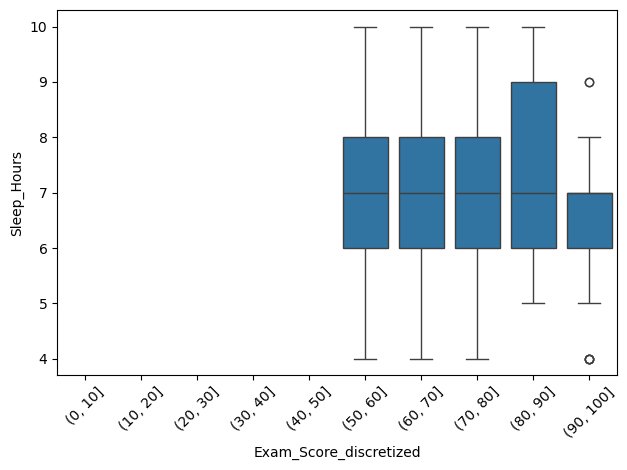

In [3]:
# Scatterplot wasn't very informative 
# Discretized exam scores in order to make it categorical
df['Exam_Score_discretized'] = pd.cut(df['Exam_Score'], [0,10,20,30,40,50,60,70,80,90,100])
# Then created a boxplot
sns.boxplot(data=df,x='Exam_Score_discretized', y='Sleep_Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Exam_score_and_sleep_hours.png', format='png')
plt.show()

In [4]:
import numpy as np
from scipy import stats
# The boxplot was much more informative and there seems to be a correlation
# Conducting a t-test
# Creating filters for 3 ranges (the other 2 are the exact same)
df_70_80 = df[(df['Exam_Score'] >= 70) & (df['Exam_Score'] < 80)]
df_80_90 = df[(df['Exam_Score'] >= 80) & (df['Exam_Score'] < 90)]
df_90_100 = df[(df['Exam_Score'] >= 90) & (df['Exam_Score'] <= 100)]

# T-test for ranges 70-80 and 80-90
p_value1 = stats.ttest_ind(df_70_80['Sleep_Hours'], df_80_90['Sleep_Hours'], equal_var=False)
print(p_value1)

# T-test for ranges 70-80 and 90-100
p_value2 = stats.ttest_ind(df_70_80['Sleep_Hours'], df_90_100['Sleep_Hours'], equal_var=False)
print(p_value2)

# T-test for ranges 80-90 and 90-100
p_value3 = stats.ttest_ind(df_80_90['Sleep_Hours'], df_90_100['Sleep_Hours'], equal_var=False)
print(p_value3)


TtestResult(statistic=-0.6921330149296083, pvalue=0.49500822832088964, df=25.918859154806007)
TtestResult(statistic=1.6248295288856571, pvalue=0.11948514870881952, df=20.48682124144576)
TtestResult(statistic=1.7083315979646787, pvalue=0.09514717430851961, df=40.942183568776485)


In [5]:
import pandas as pd
# Reading a second dataset and checking if everything is correct
df2 = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", sep=',') 
print("Shape:", df2.shape)
df2.head() 

Shape: (374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


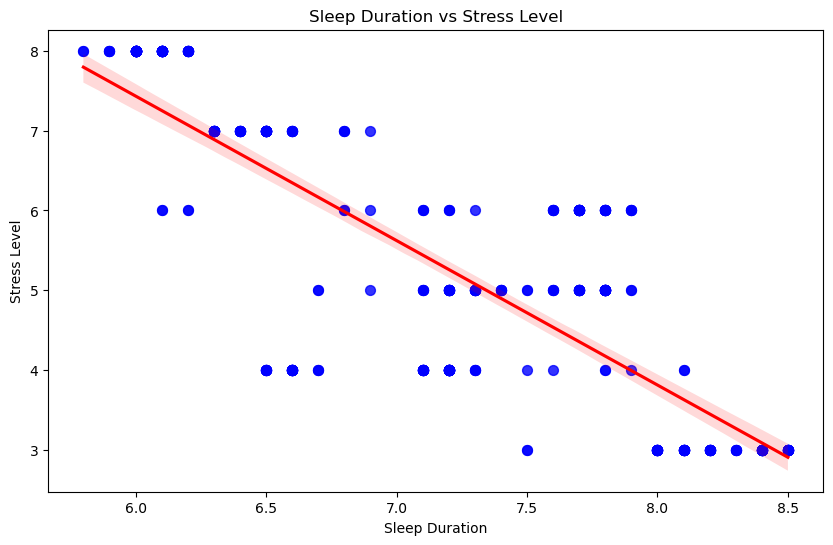

In [6]:
# Seeing if there is a linear relationship between sleep duration and stress level
plt.figure(figsize=(10,6))
sns.regplot(x='Sleep Duration', y='Stress Level', data=df2, scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Sleep Duration vs Stress Level')
plt.xlabel('Sleep Duration')
plt.ylabel('Stress Level')
plt.savefig('Stress_level_and_sleep_duration.png', format='png')
plt.show()

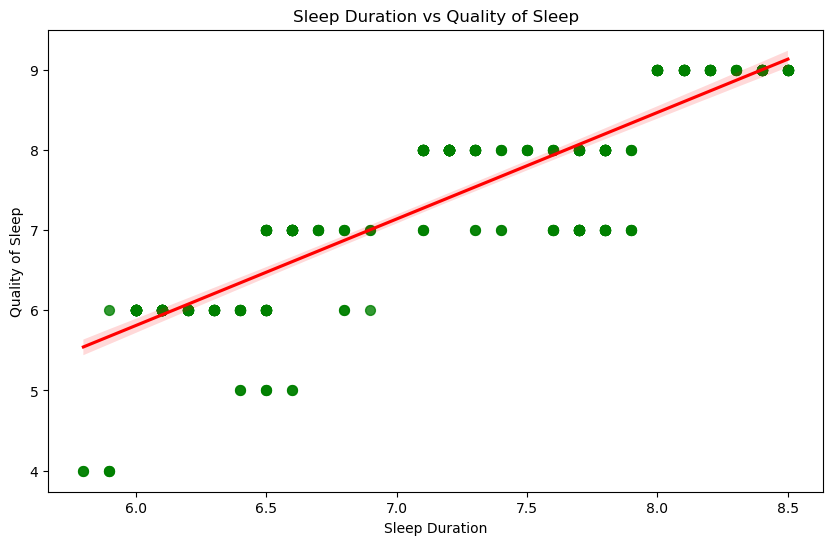

In [7]:
# Seeing if there is a linear relationship between sleep duration and quality of sleep
plt.figure(figsize=(10,6))
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=df2, scatter_kws={'s': 50, 'color': 'green'}, line_kws={'color': 'red'})
plt.title('Sleep Duration vs Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

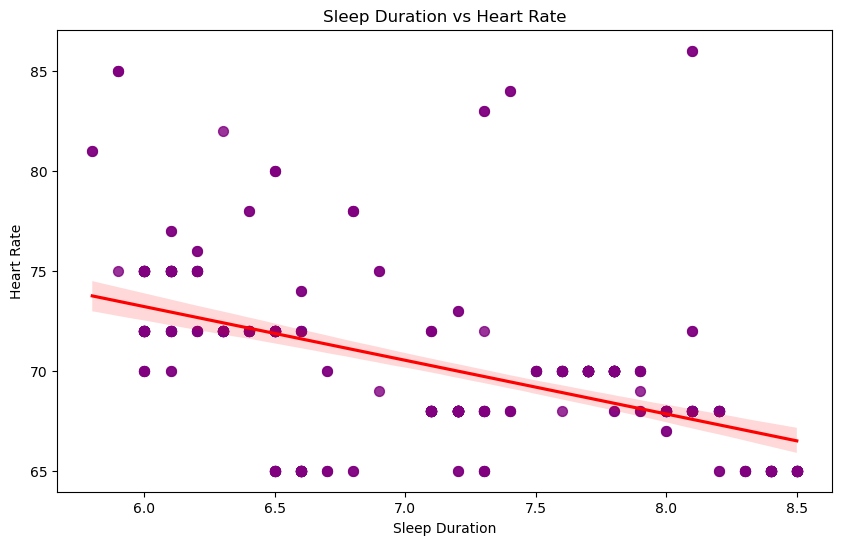

In [8]:
# Seeing if there is a linear relationship between sleep duration and heart rate
plt.figure(figsize=(10,6))
sns.regplot(x='Sleep Duration', y='Heart Rate', data=df2, scatter_kws={'s': 50, 'color': 'purple'}, line_kws={'color': 'red'})
plt.title('Sleep Duration vs Heart Rate')
plt.xlabel('Sleep Duration')
plt.ylabel('Heart Rate')
plt.show()

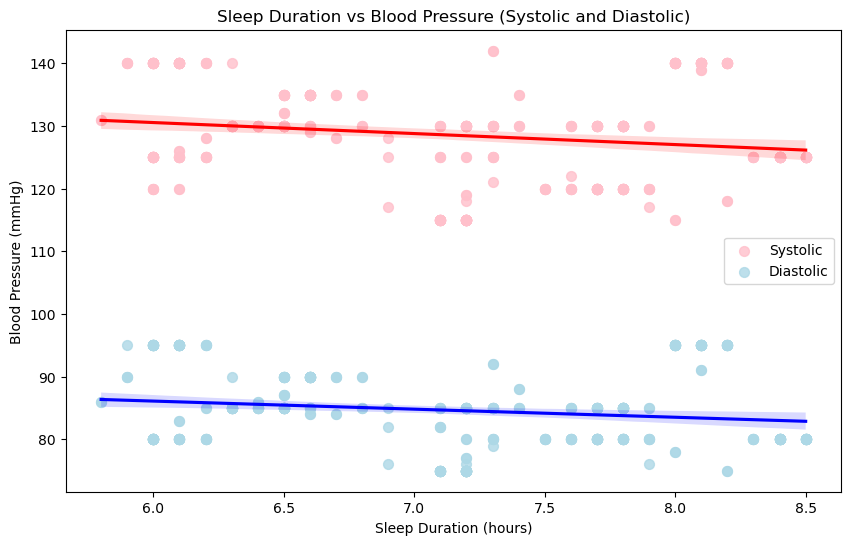

In [9]:
# Seeing if there is a linear relationship between sleep duration and blood pressure
# Splitting the blood pressure into systolic and diastolic
df2[['Systolic', 'Diastolic']] = df2['Blood Pressure'].str.split('/', expand=True)
df2['Systolic'] = df2['Systolic'].astype(float)
df2['Diastolic'] = df2['Diastolic'].astype(float)
plt.figure(figsize=(10,6))
sns.regplot(x='Sleep Duration', y='Systolic', data=df2, scatter_kws={'s': 50, 'color': 'pink'}, line_kws={'color': 'red'}, label='Systolic')
sns.regplot(x='Sleep Duration', y='Diastolic', data=df2, scatter_kws={'s': 50, 'color': 'lightblue'}, line_kws={'color': 'blue'}, label='Diastolic')
plt.title('Sleep Duration vs Blood Pressure (Systolic and Diastolic)')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()

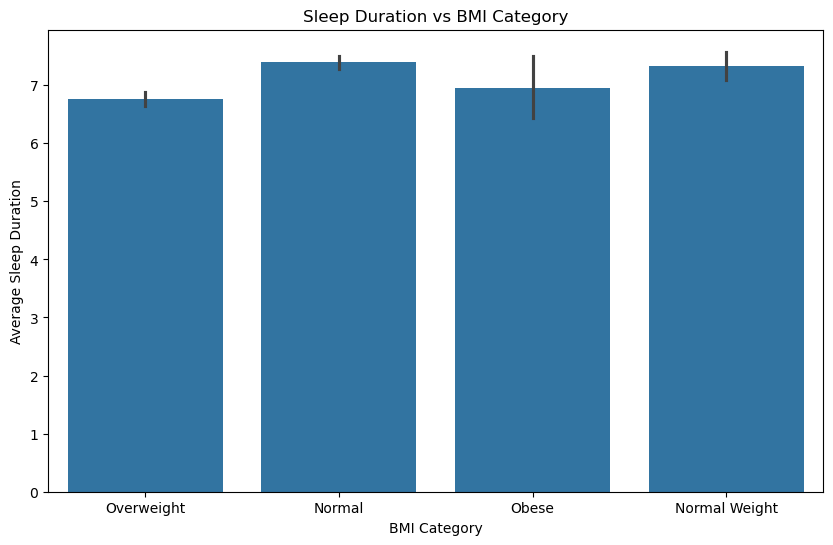

In [10]:
# Seeing if there is a correlation between sleep duration and BMI
plt.figure(figsize=(10,6))
sns.barplot(x='BMI Category', y='Sleep Duration', data=df2)
plt.title('Sleep Duration vs BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Sleep Duration')
plt.show()